In [12]:
#import libraries needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

---
create two cloyd of points in2-dimensional space and plot it, divided by color

In [ ]:
a1 = np.random.normal(0, 1, (2, 100))
a2 = np.random.normal(3, 0.1, (2, 100))

b1 = np.zeros((100, ))
b2 = np.ones((100, ))

#Visualize them (coloring by class)

# Join together x1 x2
A = np.concatenate((a1, a2), axis=1)
B = np.concatenate((b1, b2))

print(A.shape)
print(B.shape)

#200 data of dimension 2

# Visualize
plt.scatter(A[0, :], A[1, :], c=B)  #c=B when B is 0 use one color when is 1 use another one and so on
plt.show()

---

In [13]:
# Import the data (MNIST) as always abd dplit it into X, Y
# Isolate X1, X2, X3 from X, where:
    # - X1 is the sub-data of X containing 0
    # - X1 is the sub-data of X containing 6
    # - X1 is the sub-data of X containing 9
# Splt Y inyo Y1, Y2, Y3 accordingly


data = pd.read_csv('./data.csv')
print(data.shape)

data = np.array(data)   #we will lose the name of the columns and the row number
X = data[:, 1:].T
Y = data[:, 0]

d, N = X.shape

#Find the corresponding indeces
I1 = (Y==0) #position of data corresponding to 0
I2 = (Y==6)
I3 = (Y==9)

X1 = X[:, I1]
Y1 = Y[I1]

print(X1.shape)

X2 = X[:, I2]
Y2 = Y[I2]

X3 = X[:, I3]
Y3 = Y[I3]

(42000, 785)
(784, 4132)


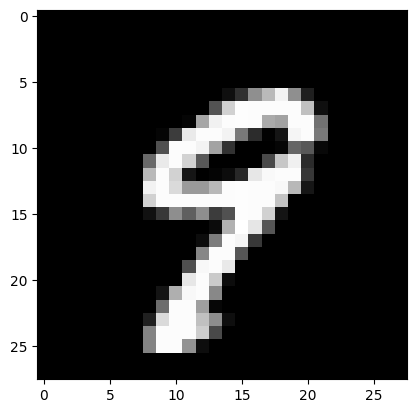

In [3]:
plt.imshow(np.reshape(X3[:, 0], (28, 28)), cmap='gray')
plt.show()

In [4]:
X = np.concatenate((X1, X2, X3), axis=1)
Y = np.concatenate((Y1, Y2, Y3))

print(X.shape)

(784, 12457)


In [5]:
def get_centroid(X):
    return np.mean(X, axis=1)   #axis = 1: applied by row

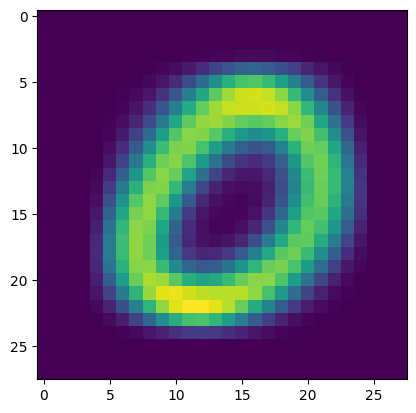

(784, 784)
(784, 4132)
(784, 4132)
784
(784, 784)


In [10]:
# Class centroids
c1 = get_centroid(X1)
r, = c1.shape
c1 = np.reshape(c1, (r, 1))

c2 = get_centroid(X2)
r, = c2.shape
c2 = np.reshape(c2, (r, 1))

c3 = get_centroid(X3)
r, = c3.shape
c3 = np.reshape(c3, (r, 1))


# Global centroid
C = get_centroid(X)


plt.imshow(np.reshape(c1, (28,28)))
plt.show()

#Within-clusters Scatter Matrix

X_c1 = X - c1  #c1 è statp reshape per fare differenza tra matrix - column vector !! importante
X_c2 = X - c2
X_c3 = X - c3


X_w = np.concatenate((X_c1, X_c2, X_c3), axis=1)


S_w = X_w @ X_w.T

print(S_w.shape)

# Between-clusters Scatter Matrix

X1_bar = np.repeat(c1, X1.shape[1], axis=1)
print(X1_bar.shape)
print(X1.shape)
X2_bar = np.repeat(c2, X2.shape[1], axis=1)
X3_bar = np.repeat(c2, X3.shape[1], axis=1)

X_bar = np.concatenate((X1_bar, X2_bar, X3_bar), axis=1)

Xc_bar = X_bar - C.reshape(d,1)

S_b = Xc_bar @ Xc_bar.T

print(S_b.shape)



np.linalg.cholesky(S_w)

In [7]:
#We want to compute the Cholesky decomposition

try:
    L = np.linalg.cholesky(S_w)
except:
    eps = 1e-6
    S_w = S_w + eps * np.eye(S_w.shape[0])
    
    L = np.linalg.cholesky(S_w)

print(L.shape)

(784, 784)


In [8]:
import scipy
import scipy.sparse
import scipy.sparse.linalg

(784, 2)
(2, 12457)


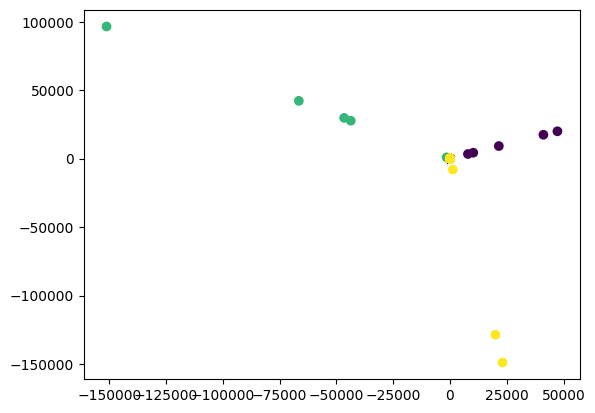

In [9]:
_, w = scipy.sparse.linalg.eigs(np.linalg.inv(L).T @ S_b @ L.T, k=2) #the two largest eigenvalues andd the corresponding eigenvector
w = np.real(w)
print(w.shape)

Q = np.linalg.inv(L) @ w

#Visualize
Z = Q.T @ X
print(Z.shape)

plt.scatter(Z[0, :], Z[1, :], c=Y)  
plt.show()

In [21]:
numbers = [0, 6, 9]
idx = [index for index, elem in enumerate(Y) if elem in numbers]

X = X[:, idx]     #take all the rows and just the columns idx
Y = Y[idx]

print(X.shape, Y.shape)

(784, 12457) (12457,)


In [22]:
def split_data(X, Y, Ntrain):

    d, N = X.shape

    idx = np.arange(N)
    np.random.shuffle(idx)

    train_idx = idx[:Ntrain]
    test_idx = idx[Ntrain:]

    Xtrain = X[:, train_idx]
    Ytrain = Y[train_idx]
    
    Xtest = X[:, test_idx]
    Ytest = Y[test_idx]

    return (Xtrain, Ytrain), (Xtest, Ytest)

Ntrain = 8000

(Xtrain, Ytrain) ,(Xtest, Ytest) = split_data(X,Y,Ntrain)
print(Xtrain.shape, Xtest.shape, Ytrain.shape, Ytest.shape)

(784, 8000) (784, 4457) (8000,) (4457,)


In [23]:
def LDA(Xt,Yt,K=2):
    d,N=Xt.shape
    X1=Xt[:,Yt==0]
    X2=Xt[:,Yt==6]
    X3=Xt[:,Yt==9]
    Y1=Yt[Yt==0]
    Y2=Yt[Yt==6]
    Y3=Yt[Yt==9]
    X=np.concatenate((X1,X2,X3),axis=1)  
    Yl=np.concatenate((Y1,Y2,Y3))
    C1=np.mean(X1,axis=1)
    C2=np.mean(X2,axis=1)
    C3=np.mean(X3,axis=1)
    C=np.mean(X,axis=1)
    
    X1c=X1-C1.reshape((d,1))
    X2c=X2-C2.reshape((d,1))
    X3c=X3-C3.reshape((d,1))
    Xw=np.concatenate((X1c,X2c,X3c),axis=1)
    Sw=Xw @ Xw.T
    Xbar1 = np.repeat(C1.reshape(d, 1), X1.shape[1], axis=1)
    Xbar2 = np.repeat(C2.reshape(d, 1), X2.shape[1], axis=1)
    Xbar3 = np.repeat(C3.reshape(d, 1), X3.shape[1], axis=1)
    Xbar=np.concatenate((Xbar1,Xbar2,Xbar3),axis=1)
    print(Xbar.shape)
    Xbarc=Xbar-C.reshape((d,1))
    Sb=Xbarc @ Xbarc.T
    try:
        L=np.linalg.cholesky(Sw)
    except:
        epsilon=1e-6
        Sw=Sw+epsilon*np.eye(Sw.shape[0])
        L=np.linalg.cholesky(Sw)
    _,W=scipy.sparse.linalg.eigs(np.linalg.inv(L) @ Sb @ L,k=2)
    W=np.real(W)
    Q=np.linalg.inv(L).T @ W
    Z=Q.T @ X
    return Z

(784, 8000)


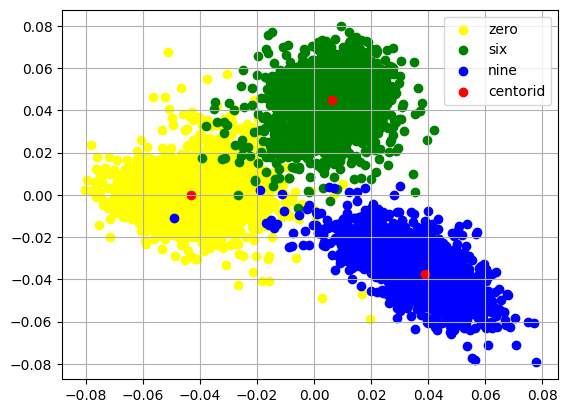

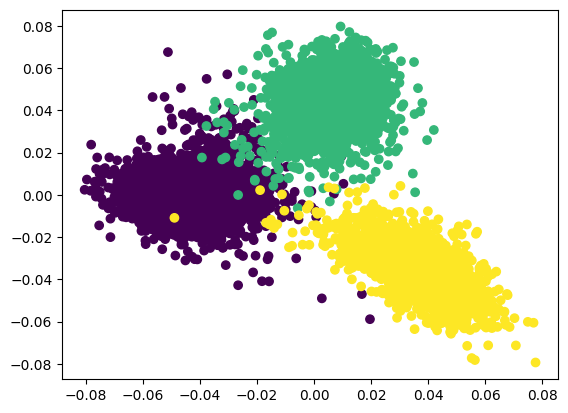

In [32]:
Zl = LDA(Xtrain, Ytrain, 2)

Y1=Ytrain[Ytrain==0]
Y2=Ytrain[Ytrain==6]
Y3=Ytrain[Ytrain==9]
Yl=np.concatenate((Y1,Y2,Y3))
Cl0=np.mean(Zl[:,Yl==0],axis=1)
Cl6=np.mean(Zl[:,Yl==6],axis=1)
Cl9=np.mean(Zl[:,Yl==9],axis=1)
Cl=[Cl0,Cl6,Cl9]
Cl=np.array(Cl)
zerol=plt.scatter(Zl[0,Yl==0],Zl[1,Yl==0],marker="o", color='yellow')
sixl=plt.scatter(Zl[0,Yl==6],Zl[1,Yl==6],marker="o", color='green')
ninel=plt.scatter(Zl[0,Yl==9],Zl[1,Yl==9],marker="o", color='blue')
for i in range(3):
    centroidl=plt.scatter(Cl[i][0],Cl[i][1],marker="o",color="red")
plt.legend((zerol,sixl,ninel,centroidl),("zero","six","nine","centorid"))
plt.grid()
plt.show()

plt.scatter(Zl[0,:], Zl[1,:], c=Yl)
plt.show()

